In [ ]:
from google.colab import drive
drive.mount('/content/drive')

dataset_path = '/content/drive/MyDrive/rain_prediction/vd.csv'
test_path = '/content/drive/MyDrive/rain_prediction/new_test.csv'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 1. Read dataset





In [ ]:
import pandas as pd
import numpy as np
data = pd.read_csv(dataset_path, na_values = '-', encoding = 'utf-8')
data = data.drop(columns=['Unnamed: 0'])
data = data.drop(columns=['days'])
data['date'] = pd.to_datetime(data['date'], format='%d/%m/%Y')
data.set_index('date', inplace=True) #set datetime as index
data

,rain,sun_hours,temp_max,temp_mean,temp_min,vapor_max,vapor_mean,vapor_min,wind_mean,rain_status
date,,,,,,,,,,
2018-01-01,0.0,7.8,29.6,25.4,22.2,15.5,23.1,21.7,0.5,Không mưa
2018-01-02,0.1,9.2,29.8,25.5,21.4,18.0,24.6,23.5,1.3,Mưa không đáng kể
2018-01-03,0.0,9.3,31.1,26.4,22.7,13.9,27.1,26.8,0.3,Không mưa
2018-01-04,0.3,4.3,32.4,28.0,25.2,16.5,28.5,26.2,0.5,Mưa không đáng kể
2018-01-05,1.8,2.6,31.0,27.6,25.8,10.9,32.3,31.1,0.5,Mưa nhỏ
...,...,...,...,...,...,...,...,...,...,...
2022-12-27,0.0,8.5,28.8,24.6,21.0,14.6,22.1,21.4,0.5,Không mưa
2022-12-28,0.2,9.3,30.3,24.8,20.7,19.2,22.4,21.1,0.8,Mưa không đáng kể
2022-12-29,0.2,7.9,30.6,25.2,21.3,13.4,24.4,23.2,0.8,Mưa không đáng kể


In [ ]:
import pandas as pd
import numpy as np
test_data = pd.read_csv(test_path, na_values = '-', encoding = 'utf-8')
test_data = test_data.drop(columns=['Unnamed: 0'])
test_data = test_data.drop(columns=['days'])
test_data['date'] = pd.to_datetime(test_data['date'], format='%d/%m/%Y')
test_data.set_index('date', inplace=True) #set datetime as index
test_data

,rain,sun_hours,temp_max,temp_mean,temp_min,vapor_max,vapor_mean,vapor_min,wind_mean,rain_status
date,,,,,,,,,,
2018-01-01,0.1,7.8,29.6,25.4,22.2,15.5,23.1,21.7,0.5,Mưa không đáng kể
2018-01-02,0.0,9.2,29.8,25.5,21.4,18.0,24.6,23.5,1.3,Không mưa
2018-01-03,0.2,9.3,31.1,26.4,22.7,13.9,27.1,26.8,0.3,Mưa không đáng kể
2018-01-04,0.2,4.3,32.4,28.0,25.2,16.5,28.5,26.2,0.5,Mưa không đáng kể
2018-01-05,1.8,2.6,31.0,27.6,25.8,10.9,32.3,31.1,0.5,Mưa nhỏ
...,...,...,...,...,...,...,...,...,...,...
2018-12-27,16.8,3.6,31.0,26.2,23.5,11.4,29.9,28.1,0.0,Mưa vừa
2018-12-28,1.2,6.8,31.2,26.9,23.8,18.6,28.3,25.9,0.5,Mưa nhỏ
2018-12-29,4.5,7.4,32.1,27.3,24.5,19.8,28.5,27.2,0.8,Mưa


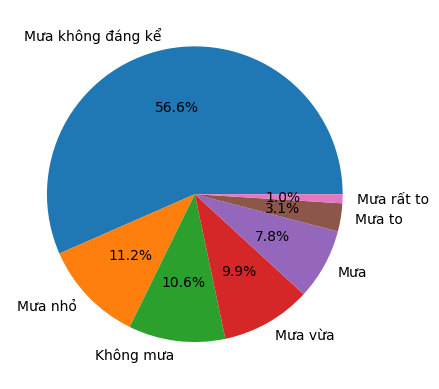

In [ ]:
from matplotlib import pyplot as plt
plt.pie(data['rain_status'].value_counts().values,
        labels = data['rain_status'].value_counts().index,
        autopct='%1.1f%%')
plt.show()

In [ ]:
data.groupby(['rain_status']).agg(['mean'])

,rain,sun_hours,temp_max,temp_mean,temp_min,vapor_max,vapor_mean,vapor_min,wind_mean
,mean,mean,mean,mean,mean,mean,mean,mean,mean
rain_status,,,,,,,,,
Không mưa,0.000000,7.835751,32.949223,28.180829,25.000000,19.886010,28.818135,26.823316,0.715544
Mưa,5.107042,5.582394,32.326056,27.685915,25.235211,15.185211,30.270423,28.526056,0.826056
Mưa không đáng kể,0.177251,7.753437,32.900968,28.038045,24.739206,20.185576,28.298935,26.306002,0.751016
Mưa nhỏ,1.426961,6.018627,32.569118,27.999020,25.403922,16.816667,30.275980,28.466176,0.877941
Mưa rất to,71.900000,2.938889,31.094444,26.738889,24.216667,10.622222,30.661111,29.066667,0.600000
Mưa to,36.008929,4.732143,31.807143,27.157143,24.296429,14.230357,29.867857,28.169643,0.789286
Mưa vừa,14.661667,4.795556,31.873333,27.395000,24.970000,13.555000,30.406111,28.730556,0.810000


In [ ]:
import numpy as np
features = list(data.select_dtypes(include = np.number).columns)
print(features)


['rain', 'sun_hours', 'temp_max', 'temp_mean', 'temp_min', 'vapor_max', 'vapor_mean', 'vapor_min', 'wind_mean']


<ipython-input-7-a1f21e3ae279>:16: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col], ax=ax)  # Create distplot on current subplot
<ipython-input-7-a1f21e3ae279>:16: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col], ax=ax)  # Create distplot on current subplot
<ipython-input-7-a1f21

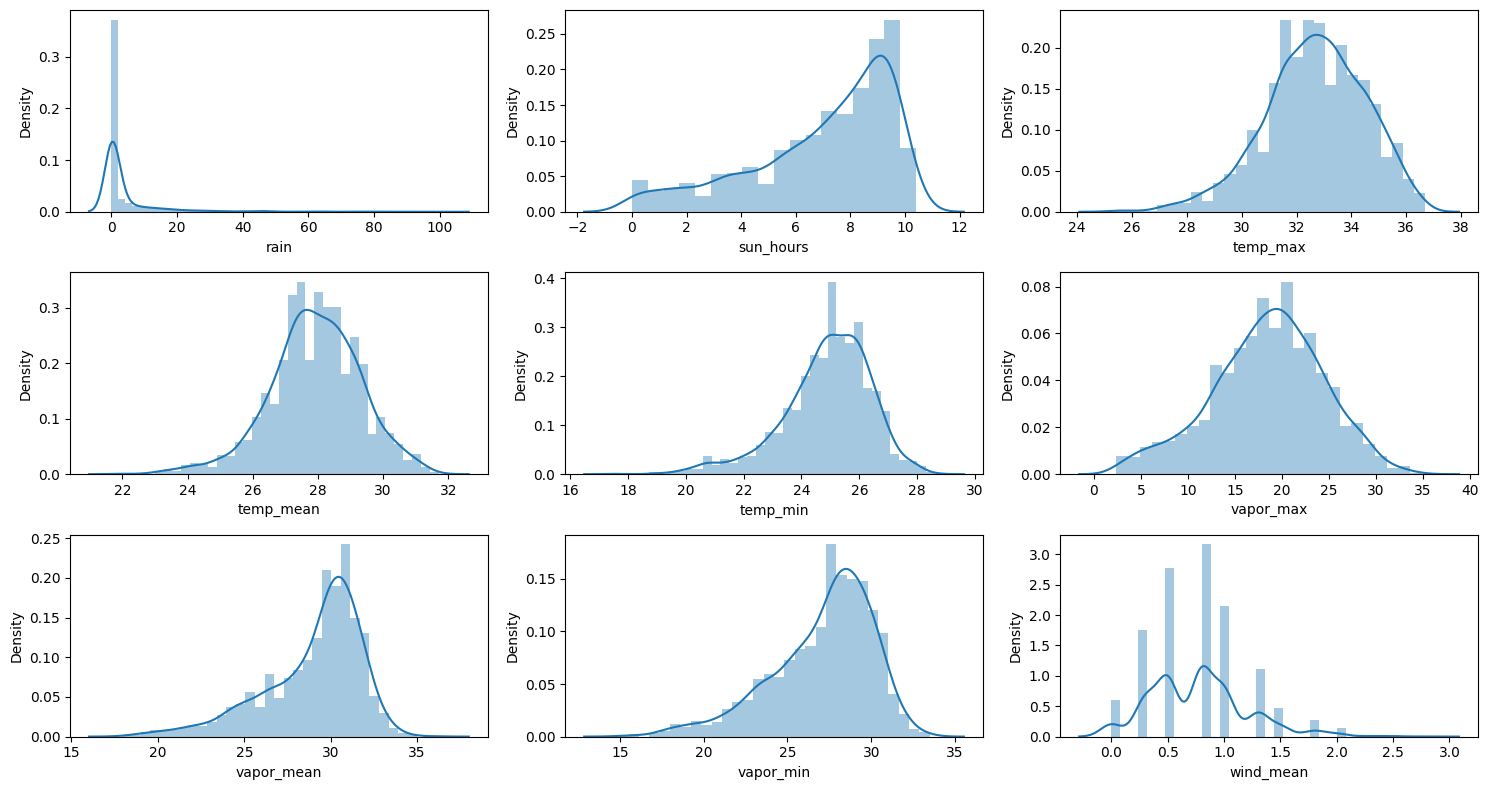

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have your data in a pandas DataFrame named 'data'
# and a list of features you want to visualize

num_features = len(features)
rows, cols = 3, 3  # Create a 3x3 grid of subplots

# Create the subplots using plt.subplots()
fig, axes = plt.subplots(rows, cols, figsize=(15, 8))

# Enumerate through the features and create distplots on each subplot
for i, col in enumerate(features):
    ax = axes.flat[i]  # Access each subplot using flattened array
    sns.distplot(data[col], ax=ax)  # Create distplot on current subplot

# Adjust layout to prevent overlapping elements
plt.tight_layout()

# Display the plot
plt.show()

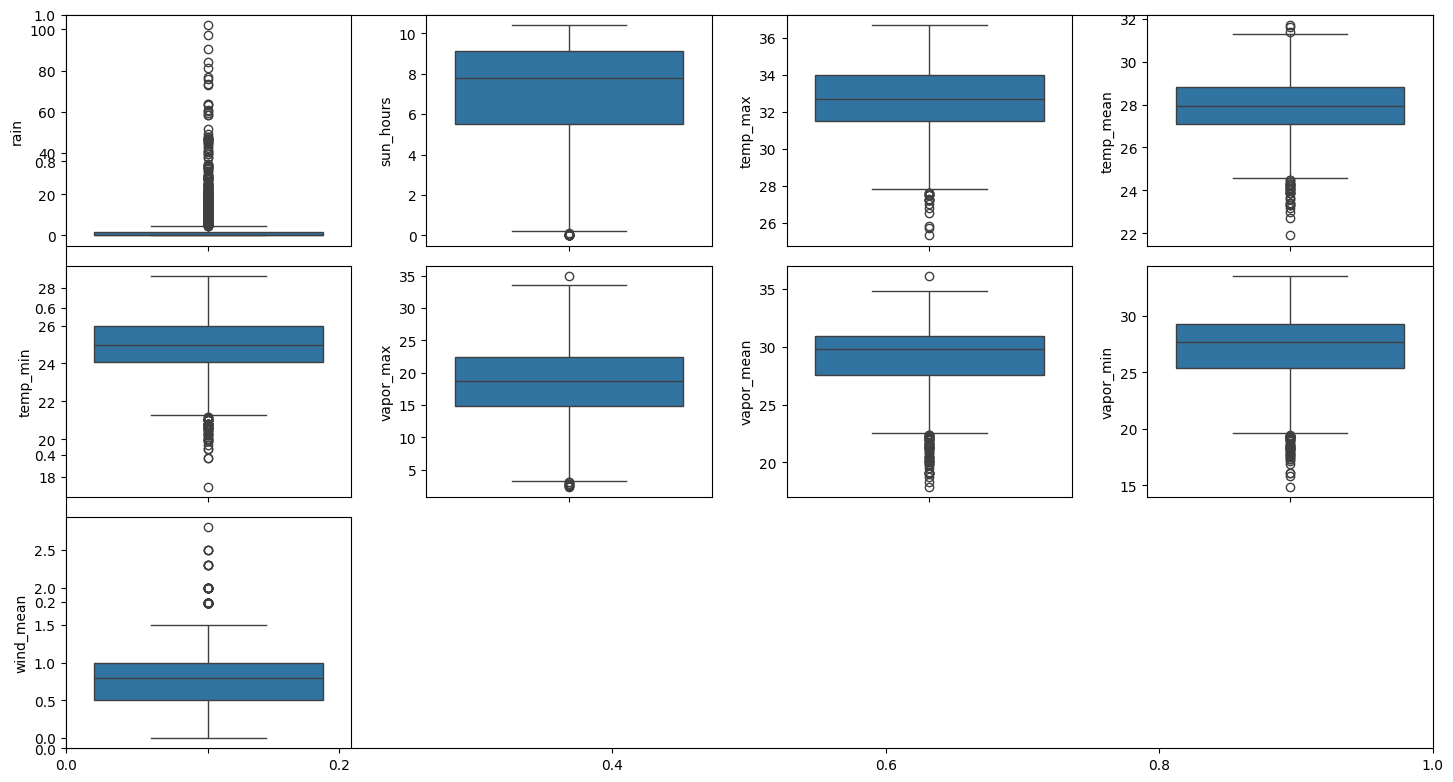

In [ ]:
plt.subplots(figsize=(15,8))

# Calculate the number of subplots needed
num_subplots = len(features)

# Calculate the number of rows and columns for the grid
# Adjust the number of rows or columns as needed to fit all subplots
num_rows = (num_subplots + 3) // 4  # Calculate rows, ensuring at least 2 rows
num_cols = 4  # Set the desired number of columns

# Iterate through features and create subplots
for i, col in enumerate(features):
    plt.subplot(num_rows, num_cols, i + 1)  # Use calculated rows and columns
    sns.boxplot(data[col])

plt.tight_layout()
plt.show()

In [ ]:
# Ensure consistent formatting
#data['rain_status'] = data['rain_status'].str.strip()

# Replace using the dictionary
"""
classes = {
    'Không mưa':0,
    'Mưa không đáng kể':1,
    'Mưa nhỏ':2,
    'Mưa':3,
    'Mưa vừa':4,
    'Mưa to':5,
    'Mưa rất to':6
}
"""
manual_mapping = {
    'Mưa không đáng kể': 'Mưa không đáng kể',
    'Mưa nhỏ': 'Mưa nhỏ',
    'Mưa vừa': 'Mưa vừa',
    'Mưa rất to': 'Mưa rất to',
    # Add other mappings if necessary
}

# Apply manual mapping
data['rain_status'] = data['rain_status'].replace(manual_mapping)
test_data['rain_status'] = test_data['rain_status'].replace(manual_mapping)
# Retry replacement
#data['rain_status'] = data['rain_status'].replace(classes)
#test_data['rain_status'] = test_data['rain_status'].replace(classes)

# Replace values
data['rain_status'].unique()





array(['Không mưa', 'Mưa không đáng kể', 'Mưa nhỏ', 'Mưa', 'Mưa vừa',
       'Mưa to', 'Mưa rất to'], dtype=object)

In [ ]:
features = data.drop(['rain_status'], axis=1)
no_date_data=data.replace(np.nan, 0)
target = no_date_data.rain_status
features

,rain,sun_hours,temp_max,temp_mean,temp_min,vapor_max,vapor_mean,vapor_min,wind_mean
date,,,,,,,,,
2018-01-01,0.0,7.8,29.6,25.4,22.2,15.5,23.1,21.7,0.5
2018-01-02,0.1,9.2,29.8,25.5,21.4,18.0,24.6,23.5,1.3
2018-01-03,0.0,9.3,31.1,26.4,22.7,13.9,27.1,26.8,0.3
2018-01-04,0.3,4.3,32.4,28.0,25.2,16.5,28.5,26.2,0.5
2018-01-05,1.8,2.6,31.0,27.6,25.8,10.9,32.3,31.1,0.5
...,...,...,...,...,...,...,...,...,...
2022-12-27,0.0,8.5,28.8,24.6,21.0,14.6,22.1,21.4,0.5
2022-12-28,0.2,9.3,30.3,24.8,20.7,19.2,22.4,21.1,0.8
2022-12-29,0.2,7.9,30.6,25.2,21.3,13.4,24.4,23.2,0.8


In [ ]:
target

,rain_status
date,
2018-01-01,Không mưa
2018-01-02,Mưa không đáng kể
2018-01-03,Không mưa
2018-01-04,Mưa không đáng kể
2018-01-05,Mưa nhỏ
...,...
2022-12-27,Không mưa
2022-12-28,Mưa không đáng kể
2022-12-29,Mưa không đáng kể


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import OneHotEncoder, normalize, OrdinalEncoder, MinMaxScaler
import numpy as np
from imblearn.over_sampling import SVMSMOTE
from sklearn.model_selection import train_test_split

categories = [['Không mưa', 'Mưa không đáng kể', 'Mưa nhỏ', 'Mưa', 'Mưa vừa', 'Mưa to', 'Mưa rất to']]
# Assuming X and y are your features and labels
X = features.values  # Input features (rain, sun_hours, temp_max, etc.)
y = target.values  # Rain status labels

X_test2 = test_data.drop(['rain_status'], axis=1).values
y_test2 = test_data.rain_status.values

#rain = data['rain'].values
# One-hot encode rain_status
encoder = OrdinalEncoder(categories=categories)
y_encoded = encoder.fit_transform(y.reshape(-1, 1))
#y_encoded = y_encoded.toarray()

onehot_encoder = OneHotEncoder(sparse_output=False)
y_encoded = onehot_encoder.fit_transform(y_encoded.reshape(-1, 1))
print(y_encoded)

y_test2_encoded = encoder.transform(y_test2.reshape(-1, 1))
y_test2_encoded = onehot_encoder.transform(y_test2_encoded.reshape(-1, 1))
#y_test2_encoded = y_test2_encoded.toarray()

X_train_val, X_test, \
	Y_train_val, Y_test = train_test_split(features,
									y_encoded,
									test_size=0.2,
									shuffle=False,
									random_state=42)
#rain_test = X_test['rain'].values
#print(rain_test)

X_train, X_val, \
	Y_train, Y_val = train_test_split(X_train_val,
									Y_train_val,
									test_size=0.25,
									shuffle=False,
									random_state=42)

#X_test2 = X_val.copy() # Removed extra indentation
#Y_test2 = Y_val.copy() # Removed extra indentation

[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]


In [ ]:
smote= SVMSMOTE(random_state=42)
X_train, Y_train = smote.fit_resample(X_train, Y_train)

# Calculate k_neighbors based on the minimum number of samples in each class in Y_val
from collections import Counter
minority_class_counts = [count for _, count in Counter(np.argmax(Y_val, axis=1)).items() if count <= 5]
k_neighbors_val = min(5, min(minority_class_counts) - 1) if minority_class_counts else 1  # Ensure k_neighbors_val is at least 1

# Adjust k_neighbors for validation set based on the count of the rarest class
smote_val = SVMSMOTE(random_state=42, k_neighbors=k_neighbors_val)
X_val, Y_val = smote_val.fit_resample(X_val, Y_val)

scaler= MinMaxScaler(feature_range=(0,1))
#X_train = normalize(X_train, norm='l2')
#X_val = normalize(X_val, norm='l2')
#X_test = normalize(X_test, norm='l2')
#X_test2 = normalize(X_test2, norm='l2')

X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)
X_test2 = scaler.transform(X_test2)

X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_val = X_val.reshape(X_val.shape[0], 1, X_val.shape[1])
X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])
X_test2 = X_test2.reshape(X_test2.shape[0], 1, X_test2.shape[1])

model = Sequential([
    LSTM(64, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True),
    Dropout(0.2),
    LSTM(32, return_sequences=True),
    Dropout(0.2),
    LSTM(16, return_sequences=False),
    Dense(16),
    Dropout(0.2),
    Dense(y_encoded.shape[1], activation='softmax')  # Number of classes
])

import tensorflow as tf

def precision(y_true, y_pred):
    y_true = tf.cast(y_true, tf.float32)  # Cast y_true to float32
    true_positives = tf.reduce_sum(tf.round(tf.clip_by_value(y_true * y_pred, 0, 1)))
    predicted_positives = tf.reduce_sum(tf.round(tf.clip_by_value(y_pred, 0, 1)))
    return true_positives / (predicted_positives + tf.keras.backend.epsilon())

def recall(y_true, y_pred):
    y_true = tf.cast(y_true, tf.float32)  # Cast y_true to float32
    true_positives = tf.reduce_sum(tf.round(tf.clip_by_value(y_true * y_pred, 0, 1)))
    possible_positives = tf.reduce_sum(tf.round(tf.clip_by_value(y_true, 0, 1)))
    return true_positives / (possible_positives + tf.keras.backend.epsilon())

def f1_score(y_true, y_pred):
    y_true = tf.cast(y_true, tf.float32)  # Cast y_true to float32
    prec = precision(y_true, y_pred)
    rec = recall(y_true, y_pred)
    return 2 * ((prec * rec) / (prec + rec + tf.keras.backend.epsilon()))

model.compile(
    optimizer='adam',
    loss='mse',
    metrics=[
        'accuracy',
        precision,
        recall,
        f1_score
    ]
)

model.summary()
# Train the model


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 1, 64)               │          18,944 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 1, 64)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 1, 32)               │          12,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 1, 32)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 16)                  │           3,136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 16)                  │             272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 7)                   │             119 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 34,887 (136.28 KB)

 Trainable params: 34,887 (136.28 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
import keras
from keras import backend as K
from keras.callbacks import CSVLogger
csv_logger = CSVLogger('/content/drive/MyDrive/rain_prediction/training.log', separator = ',', append=False)
learning_rate_reduction = [keras.callbacks.ReduceLROnPlateau(monitor='val_loss',
                                                             patience = 25, verbose=1,factor=0.5, min_lr=1e-15),
                           csv_logger]
callback = keras.callbacks.EarlyStopping(monitor='val_loss', patience=25, restore_best_weights=True)
K.clear_session()
history = model.fit(X_train, Y_train, epochs=400, batch_size = 32 , callbacks = learning_rate_reduction, validation_data=(X_val, Y_val))

Epoch 1/400
130/130 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.1796 - f1_score: 2.3296e-04 - loss: 0.1221 - precision: 0.0019 - recall: 1.2897e-04 - val_accuracy: 0.2141 - val_f1_score: 0.0330 - val_loss: 0.1171 - val_precision: 0.1250 - val_recall: 0.0203 - learning_rate: 0.0010
Epoch 2/400
130/130 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.3154 - f1_score: 0.2117 - loss: 0.1049 - precision: 0.8975 - recall: 0.1239 - val_accuracy: 0.3986 - val_f1_score: 0.0928 - val_loss: 0.1016 - val_precision: 0.1481 - val_recall: 0.0867 - learning_rate: 0.0010
Epoch 3/400
130/130 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4869 - f1_score: 0.3379 - loss: 0.0885 - precision: 0.8547 - recall: 0.2161 - val_accuracy: 0.5982 - val_f1_score: 0.2574 - val_loss: 0.0763 - val_precision: 0.3973 - val_recall: 0.2422 - learning_rate: 0.0010
Epoch 4/400
130/130 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5799 - f1_score: 0.4763 - loss: 0.0744 - precision: 0.8160 - recall: 0.3433 - val_accuracy: 

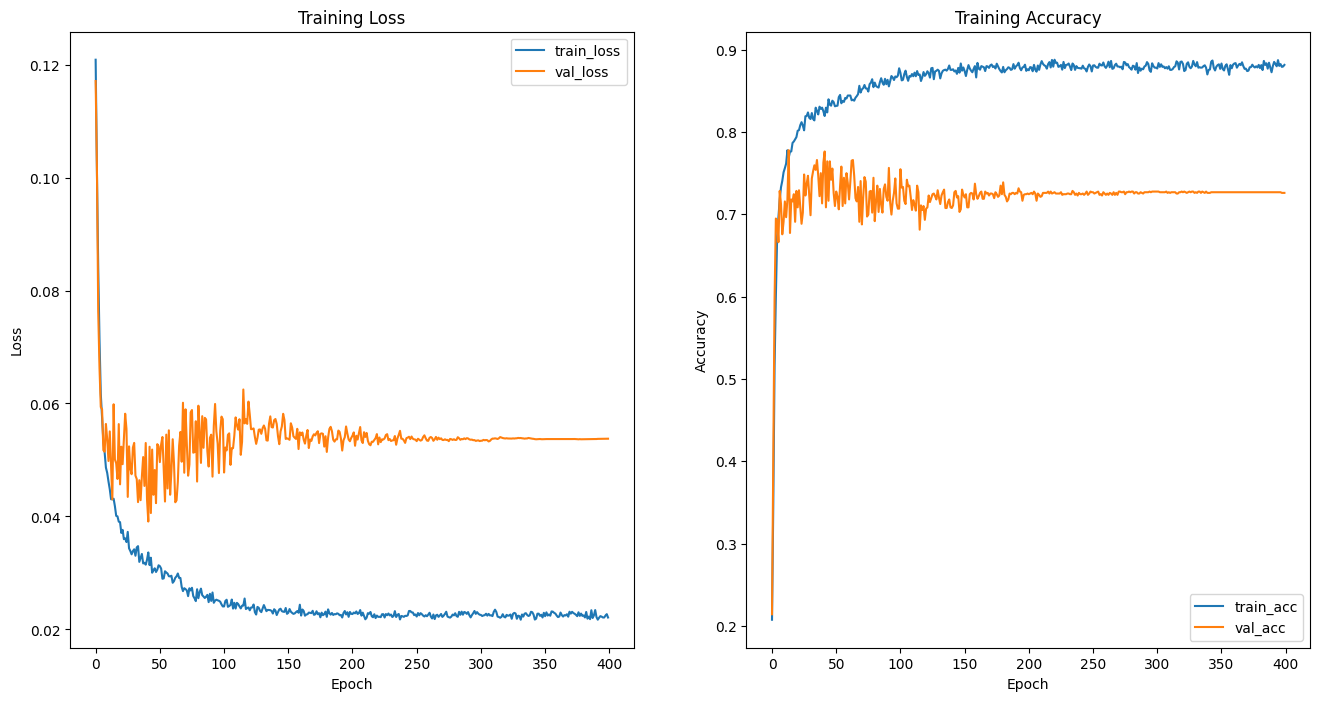

In [ ]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

from matplotlib import pyplot as plt
fig,ax=plt.subplots(1,2,figsize=(16,8))
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Accuracy')
ax[0].set_title('Training Loss')
ax[1].set_title('Training Accuracy')
ax[0].plot(hist['epoch'], hist['loss'], label='train_loss')
ax[0].plot(hist['epoch'], hist['val_loss'], label='val_loss')
plt.plot(hist['epoch'], hist['accuracy'], label='train_acc')
plt.plot(hist['epoch'], hist['val_accuracy'], label='val_acc')
plt.legend()

plt.show()


12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step
[1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 0
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 4 1 1 1 1 1 1 1 1
 1 1 1 1 2 1 3 4 1 1 1 1 2 6 2 1 4 4 4 5 1 1 1 1 1 1 1 1 1 1 2 2 1 1 1 0 1
 1 1 1 1 1 1 1 3 4 1 4 4 6 2 4 3 1 2 4 3 1 4 1 0 1 0 2 3 1 0 2 4 3 1 1 1 0
 3 4 2 3 0 3 4 2 1 3 4 1 1 1 1 4 2 2 2 1 1 1 4 1 1 2 3 2 1 3 1 1 1 2 1 4 2
 0 1 0 1 0 2 2 1 4 3 2 3 1 4 2 4 3 2 1 2 1 1 3 2 0 1 1 4 1 1 1 0 1 1 1 3 1
 1 4 1 1 1 1 3 2 4 4 1 2 1 1 1 4 4 1 1 5 1 1 1 1 2 2 1 1 4 4 1 0 1 4 4 3 1
 4 2 3 1 1 4 4 1 1 0 5 1 2 4 4 4 2 2 1 3 4 4 4 1 4 5 1 0 0 0 1 1 3 0 4 5 0
 2 2 4 2 5 1 0 1 1 1 1 1 1 1 1 0 5 1 2 2 4 1 1 1 1 3 1 5 0 1 4 3 2 5 1 1 1
 1 1 2 1 4 5 1 1 1 2 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 0 1 1 1 1]
[0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 0 0 1 1 1 1 2 1 0 1
 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 4 1 0 1 0 1 1 1 1
 1 1 1 1 2 1 3 4 1 1 1 1 2 6 2 0 4 4 4 5 2 1 1 1 1 1 0 1 1 1 2 1 0 

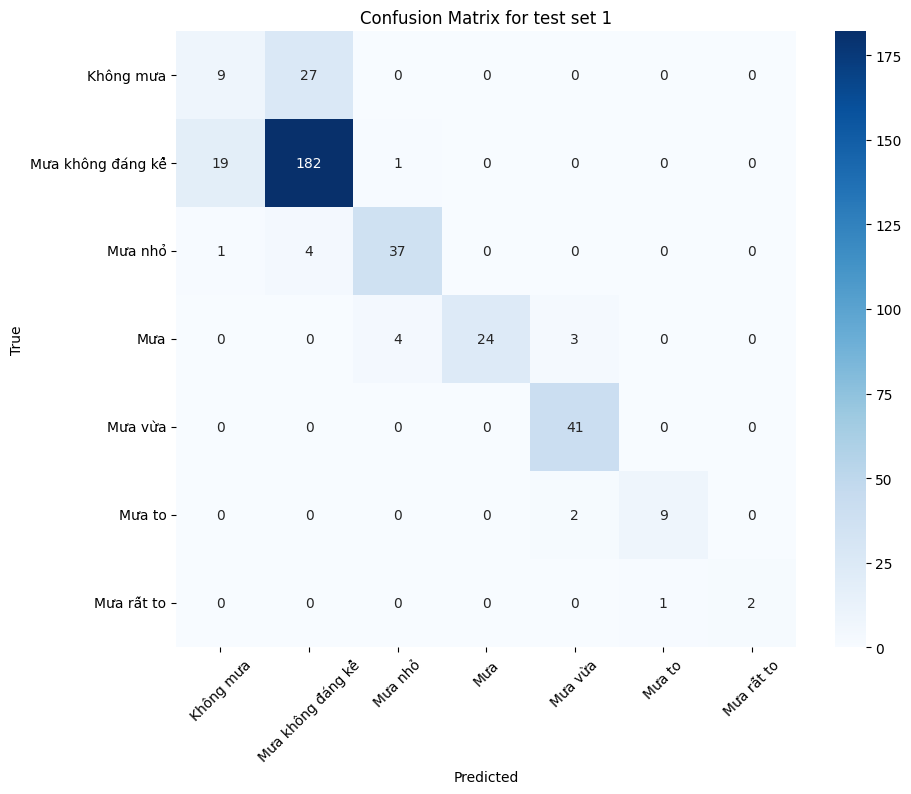

              precision    recall  f1-score   support

           0       0.31      0.25      0.28        36
           1       0.85      0.90      0.88       202
           2       0.88      0.88      0.88        42
           3       1.00      0.77      0.87        31
           4       0.89      1.00      0.94        41
           5       0.90      0.82      0.86        11
           6       1.00      0.67      0.80         3

    accuracy                           0.83       366
   macro avg       0.83      0.76      0.79       366
weighted avg       0.82      0.83      0.82       366



In [ ]:
# prompt: show confusion matrix with this model prediction

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming y_true contains the true labels and y_pred contains the model's predictions
# y_true and y_pred should be numpy arrays or lists of the same length

# Get predicted probabilities
y_pred_prob = model.predict(X_test)
thresholds = [0.2, 0.5, 0.7, 0.9]  # Adjust thresholds for better separation
y_pred_adjusted = np.digitize(y_pred_prob, bins=thresholds)

# Convert probabilities to class labels
y_pred = np.argmax(y_pred_adjusted, axis=1)
print(y_pred)
# Convert one-hot encoded y_true back to class labels
y_true = np.argmax(Y_test, axis=1)
print(y_true)

cm = confusion_matrix(y_true, y_pred)
class_labels = ['Không mưa', 'Mưa không đáng kể', 'Mưa nhỏ', 'Mưa', 'Mưa vừa', 'Mưa to', 'Mưa rất to']
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.title("Confusion Matrix for test set 1")
plt.show()

from sklearn.metrics import classification_report
print(classification_report(y_true, y_pred))

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
[1 1 1 1 2 1 1 1 0 1 1 1 1 1 1 0 1 1 3 1 1 1 4 1 1 1 0 1 4 1 0 0 1 0 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 4 1 1 1 1 1 1 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 4 5 4 1 1 2 2 2 1 0 1 3 1 1 1 0 2 1 3 1 4 1 1 2 2 1 5 1 1 1 2
 3 5 4 5 5 3 1 1 2 2 3 3 1 1 1 0 3 3 2 4 4 4 2 0 1 1 2 1 4 1 2 1 1 1 1 2 1
 2 2 1 1 1 0 1 1 0 5 1 2 4 4 4 2 1 2 0 0 0 0 1 1 1 0 1 1 2 1 0 1 4 1 2 4 4
 4 2 2 4 2 0 0 6 5 4 0 0 0 0 3 1 1 3 1 0 1 1 1 4 1 0 4 0 3 1 1 2 1 1 3 5 2
 3 3 1 0 2 4 2 1 4 1 1 0 3 4 3 2 4 3 3 3 1 1 1 1 1 6 5 1 0 2 2 1 4 2 1 1 4
 4 0 0 1 1 0 1 1 1 1 5 4 4 1 4 2 0 1 1 0 1 0 1 1 1 1 5 0 1 1 1 0 0 4 2 1 0
 0 1 2 1 1 1 0 1 1 1 1 1 1 1 1 2 4 1 0 1 0 1 1 0 1 0 6 4 2 3 3 0]
[1 0 1 1 2 1 0 1 1 1 1 1 1 1 1 0 0 1 3 1 1 1 4 1 1 1 1 1 4 1 0 1 1 0 1 1 1
 1 1 1 0 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1
 0 1 1 0 1 1 1 1 1 0 4 1 1 1 1 1 1 3 1 1 1 1 1 1 1 0 1 1 0 1 0 1 1 1 

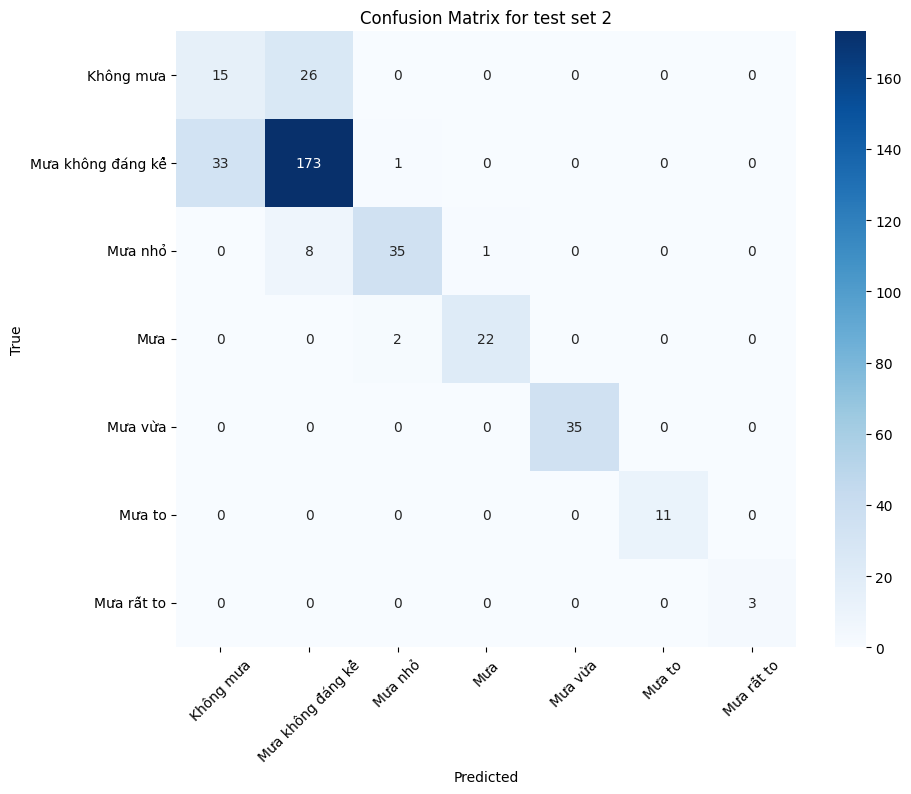

              precision    recall  f1-score   support

           0       0.31      0.37      0.34        41
           1       0.84      0.84      0.84       207
           2       0.92      0.80      0.85        44
           3       0.96      0.92      0.94        24
           4       1.00      1.00      1.00        35
           5       1.00      1.00      1.00        11
           6       1.00      1.00      1.00         3

    accuracy                           0.81       365
   macro avg       0.86      0.84      0.85       365
weighted avg       0.82      0.81      0.81       365



In [ ]:
# prompt: show confusion matrix with this model prediction

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming y_true contains the true labels and y_pred contains the model's predictions
# y_true and y_pred should be numpy arrays or lists of the same length

# Get predicted probabilities
y_pred_prob = model.predict(X_test2)
thresholds = [0.2, 0.5, 0.7, 0.9]  # Adjust thresholds for better separation
y_pred_adjusted = np.digitize(y_pred_prob, bins=thresholds)
# Convert probabilities to class labels
y_pred = np.argmax(y_pred_adjusted, axis=1)
print(y_pred)
# Convert one-hot encoded y_true back to class labels
y_true = np.argmax(y_test2_encoded, axis=1)
print(y_true)

cm = confusion_matrix(y_true, y_pred)
class_labels = ['Không mưa', 'Mưa không đáng kể', 'Mưa nhỏ', 'Mưa', 'Mưa vừa', 'Mưa to', 'Mưa rất to']
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.title("Confusion Matrix for test set 2")
plt.show()
from sklearn.metrics import classification_report
print(classification_report(y_true, y_pred))

In [ ]:
model.compile(
    optimizer='adam',
    loss='mse',
    metrics=[
        'accuracy',
        precision,
        recall,
        f1_score
    ]
)
result = model.evaluate(X_test, Y_test)
print("Test set 1 Evaluation: \n")
print("Loss: ", result[0])
print("Accuracy: ", result[1])
print("Precision: ", result[2])
print("Recall: ", result[3])
print("F1 Score: ", result[4])

12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8335 - f1_score: 0.8335 - loss: 0.0406 - precision: 0.8448 - recall: 0.8228
Test set 1 Evaluation: 

Loss:  0.03993432596325874
Accuracy:  0.8415300250053406
Precision:  0.8514935374259949
Recall:  0.8232886791229248
F1 Score:  0.8369882106781006


In [ ]:
model.compile(
    optimizer='adam',
    loss='mse',
    metrics=[
        'accuracy',
        precision,
        recall,
        f1_score
    ]
)
result = model.evaluate(X_test2, y_test2_encoded)
print("Test set 2 Evaluation: \n")
print("Loss: ", result[0])
print("Accuracy: ", result[1])
print("Precision: ", result[2])
print("Recall: ", result[3])
print("F1 Score: ", result[4])

12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8345 - f1_score: 0.8204 - loss: 0.0432 - precision: 0.8479 - recall: 0.7953
Test set 2 Evaluation: 

Loss:  0.04194456711411476
Accuracy:  0.8246575593948364
Precision:  0.8419394493103027
Recall:  0.7802484035491943
F1 Score:  0.8091948628425598


In [ ]:
"""
class_0 = []
class_1 = []
class_2 = []
class_3 = []
class_4 = []
class_5 = []
class_6 = []
for i in range(len(rain_test)):
  if rain_test[i] == 0:
      class_0.append(rain_test[i])
  elif 0 < rain_test[i] <= 0.3:
      class_1.append(rain_test[i])
  elif 0.3 < rain_test[i] <= 3:
        class_2.append(rain_test[i])
  elif 3 < rain_test[i] < 8:
      class_3.append(rain_test[i])
  elif 8 <= rain_test[i] <= 25:
      class_4.append(rain_test[i])
  elif 25 < rain_test[i] <= 50:
      class_5.append(rain_test[i])
  elif rain_test[i] > 50:
      class_6.append(rain_test[i])

for i in range(0,7):
  print(f'Class {i} {eval(f"class_{i}")}')
"""

'\nclass_0 = []\nclass_1 = []\nclass_2 = []\nclass_3 = []\nclass_4 = []\nclass_5 = []\nclass_6 = []\nfor i in range(len(rain_test)):\n  if rain_test[i] == 0:\n      class_0.append(rain_test[i])\n  elif 0 < rain_test[i] <= 0.3:\n      class_1.append(rain_test[i])\n  elif 0.3 < rain_test[i] <= 3:\n        class_2.append(rain_test[i])\n  elif 3 < rain_test[i] < 8:\n      class_3.append(rain_test[i])\n  elif 8 <= rain_test[i] <= 25:\n      class_4.append(rain_test[i])\n  elif 25 < rain_test[i] <= 50:\n      class_5.append(rain_test[i])\n  elif rain_test[i] > 50:\n      class_6.append(rain_test[i])\n\nfor i in range(0,7):\n  print(f\'Class {i} {eval(f"class_{i}")}\')\n'

In [ ]:
"""
import scipy.stats as stats
import numpy as np

def rain_estimate(value_list):
  if len(np.unique(value_list)) == 1:  # Class has 1 unique value
    return np.unique(value_list)[0], 1  # Only choose this value => prob is 1
  else:
    mean = np.mean(value_list)
    std = np.std(value_list)

    # Calculate probabilities for each value
    probabilities = [stats.norm.cdf(value, loc=mean, scale=std) for value in value_list]

    # Find the index of the maximum probability
    max_prob_index = np.argmax(probabilities)

    # Return the value corresponding to the maximum probability and the probability itself
    return value_list[max_prob_index], probabilities[max_prob_index]

rain_estimate_value_list = [rain_estimate(eval(f"class_{i}"))[0] for i in range(0,7)]
print(rain_estimate_value_list)
"""

'\nimport scipy.stats as stats\nimport numpy as np\n\ndef rain_estimate(value_list):\n  if len(np.unique(value_list)) == 1:  # Class has 1 unique value\n    return np.unique(value_list)[0], 1  # Only choose this value => prob is 1\n  else:\n    mean = np.mean(value_list)\n    std = np.std(value_list)\n\n    # Calculate probabilities for each value\n    probabilities = [stats.norm.cdf(value, loc=mean, scale=std) for value in value_list]\n\n    # Find the index of the maximum probability\n    max_prob_index = np.argmax(probabilities)\n\n    # Return the value corresponding to the maximum probability and the probability itself\n    return value_list[max_prob_index], probabilities[max_prob_index]\n\nrain_estimate_value_list = [rain_estimate(eval(f"class_{i}"))[0] for i in range(0,7)]\nprint(rain_estimate_value_list)\n'

In [ ]:
"""
rain_estimate_list = []
for i in range(len(y_pred)):
  rain_estimate = np.round(rain_estimate_value_list[y_pred[i]],1)
  rain_estimate_list.append(rain_estimate)
  print(f'Predicted rain: {rain_estimate} mm - Rain actual: {rain_test[i]} mm - Error: {rain_test[i] - rain_estimate} mm')
  """

"\nrain_estimate_list = []\nfor i in range(len(y_pred)):\n  rain_estimate = np.round(rain_estimate_value_list[y_pred[i]],1)\n  rain_estimate_list.append(rain_estimate)\n  print(f'Predicted rain: {rain_estimate} mm - Rain actual: {rain_test[i]} mm - Error: {rain_test[i] - rain_estimate} mm')\n  "

In [ ]:
 """
months = ['January', 'February', 'March', 'April', 'May', 'June',
          'July', 'August', 'September', 'October', 'November', 'December']
num_days_in_month = [31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]

# Initialize the starting index
start_idx = 0

# Loop through each month and plot rainfall data
for i in range(12):
    # Compute the end index for the current month
    end_idx = start_idx + num_days_in_month[i]

    # Ensure indices do not exceed the length of the dataset
    if start_idx >= len(rain_test):
        break
    if end_idx > len(rain_test):
        end_idx = len(rain_test)

    # Extract data for the current month
    y_test_cycle = rain_test[start_idx:end_idx]
    y_pred_cycle = rain_estimate_list[start_idx:end_idx]

    # Plotting
    plt.figure(figsize=(12, 6))
    x = np.arange(len(y_test_cycle))  # Generate x-axis indices
    bar_width = 0.4

    plt.bar(x - bar_width / 2, y_test_cycle.ravel(), width=bar_width, label='Actual Rainfall', color='blue')
    plt.bar(x + bar_width / 2, y_pred_cycle, width=bar_width, label='Predicted Rainfall', color='orange')

    # Add titles and labels
    plt.title(f'Rainfall Prediction ({months[i]})')
    plt.xlabel('Days')
    plt.ylabel('Rainfall (mm)')
    plt.xticks(x, [f'Day {j+1}' for j in range(len(y_test_cycle))], rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.show()

    # Update start index for the next month
    start_idx = end_idx


SyntaxError: incomplete input (<ipython-input-23-ff5bf55459e9>, line 1)

In [ ]:
# prompt: calculate MSE, R2score between rain estimate list and rain test list
"""
from sklearn.metrics import mean_squared_error, r2_score

# Assuming rain_estimate_list and rain_test are defined as in your provided code
mse = mean_squared_error(rain_test, rain_estimate_list)
r2 = r2_score(rain_test, rain_estimate_list)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2) Score: {r2}")
"""